<a href="https://colab.research.google.com/github/AleksandrMac/learning/blob/main/ai/hw/8_task2_%D0%94%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D0%BF%D0%BE_DataSciense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
# Загрузим все необходимые библиотеки
import os
import numpy as np
import pandas as pd

import seaborn as sns

### Задача 2.

Для выполнения работы будет использован **csv файл “IQ_countries”**, содержащий данные о среднем значении IQ по странам мира. Каждое из наблюдений в файле имеет следующие характеристики:
 - **Rank** – место в рейтинге
 - **Country** – название страны
 - **Average IQ** – средний показатель IQ
 - **Continent** – название континента
 - **Literacy Rate** – коэффициент грамотности
 - **Nobel Prices** – количество нобелевских премий
 - **Human Development Index** – индекс человеческого развития
 - **Mean years of schooling** – среднее количество лет школы
 - **Gross National Income** – показатель “валовой национальный доход”
 - **Population** – численность населения.

Задание: **проведи** разведочный анализ данных, **выяви** необычные взаимосвязи между значениями столбцов таблицы, **выполни** визуализацию, **сделай** выводы.

Файл **“IQ_countries.csv“** можно скачать по [ссылке](https://drive.google.com/file/d/1d3kt9flMqa7SLzVHXZ6zYIS-OEFrK8TF/view?usp=sharing)

In [57]:
#инициализация dataframe
FILE_ID = '1d3kt9flMqa7SLzVHXZ6zYIS-OEFrK8TF'  # ID таблицы
SHEET_NAME = 'Sheet1'  # имя листа (по умолчанию 'Sheet1')

url = f'https://drive.google.com/uc?export=download&id={FILE_ID}'

df = pd.read_csv(url)
df.head()

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,Human Development Index,Mean years of schooling,Gross National Income,Population
0,1,Japan,106.48,Asia,0.99,29.0,0.925,13.4,42274.0,123294513
1,2,Taiwan,106.47,Asia,0.96,4.0,NaN,NaN,NaN,10143543
2,3,Singapore,105.89,Asia,0.97,0.0,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,1.0,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,8.0,0.768,7.6,17504.0,1425671352


In [4]:
df.tail()

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,Human Development Index,Mean years of schooling,Gross National Income,Population
188,189,Gambia,52.68,Africa,0.58,0.0,0.500,4.6,2172.0,2773168
189,190,Guatemala,47.72,Central America,0.79,2.0,0.627,5.7,8723.0,18092026
190,191,Liberia,45.07,Africa,0.48,2.0,0.481,5.1,1289.0,5418377
191,192,Sierra Leone,45.07,Africa,0.48,0.0,0.477,4.6,1622.0,8791092
192,193,Nepal,42.99,Asia,0.65,0.0,0.602,5.1,3877.0,30896590


In [54]:
df.info()
df.describe()
df.isnull().sum()  # проверка пропущенных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     193 non-null    object 
 1   Country                  192 non-null    object 
 2   Average IQ               192 non-null    float64
 3   Continent                192 non-null    object 
 4   Literacy Rate            192 non-null    float64
 5   Nobel Prices             192 non-null    float64
 6   Human Development Index  178 non-null    float64
 7   Mean years of schooling  178 non-null    float64
 8   Gross National Income    178 non-null    float64
 9   Population               192 non-null    object 
dtypes: float64(6), object(4)
memory usage: 15.2+ KB


,0
Rank,0
Country,1
Average IQ,1
Continent,1
Literacy Rate,1
Nobel Prices,1
Human Development Index,15
Mean years of schooling,15
Gross National Income,15
Population,1


In [70]:
df = df.dropna(subset=('Country'))
df['Rank'] = df['Rank'].astype('int')
df['Population'] = df['Population'].astype('float')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 192
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     192 non-null    int64  
 1   Country                  192 non-null    object 
 2   Average IQ               192 non-null    float64
 3   Continent                192 non-null    object 
 4   Literacy Rate            192 non-null    float64
 5   Nobel Prices             192 non-null    float64
 6   Human Development Index  178 non-null    float64
 7   Mean years of schooling  178 non-null    float64
 8   Gross National Income    178 non-null    float64
 9   Population               192 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.5+ KB


In [72]:
print("\nОписательная статистика (числовые):")
print(df.describe())


Описательная статистика (числовые):
             Rank  Average IQ  Literacy Rate  Nobel Prices  \
count  192.000000  192.000000     192.000000    192.000000   
mean    97.458333   81.948854       0.863542      5.953125   
std     55.639437   13.299581       0.180465     32.052034   
min      1.000000   42.990000       0.190000      0.000000   
25%     49.750000   74.250000       0.797500      0.000000   
50%     97.500000   82.180000       0.950000      0.000000   
75%    145.250000   91.352500       0.990000      1.250000   
max    193.000000  106.480000       1.000000    400.000000   

       Human Development Index  Mean years of schooling  \
count               178.000000               178.000000   
mean                  0.722938                 9.008989   
std                   0.152365                 3.186133   
min                   0.385000                 2.100000   
25%                   0.598250                 6.400000   
50%                   0.742500                 9.3

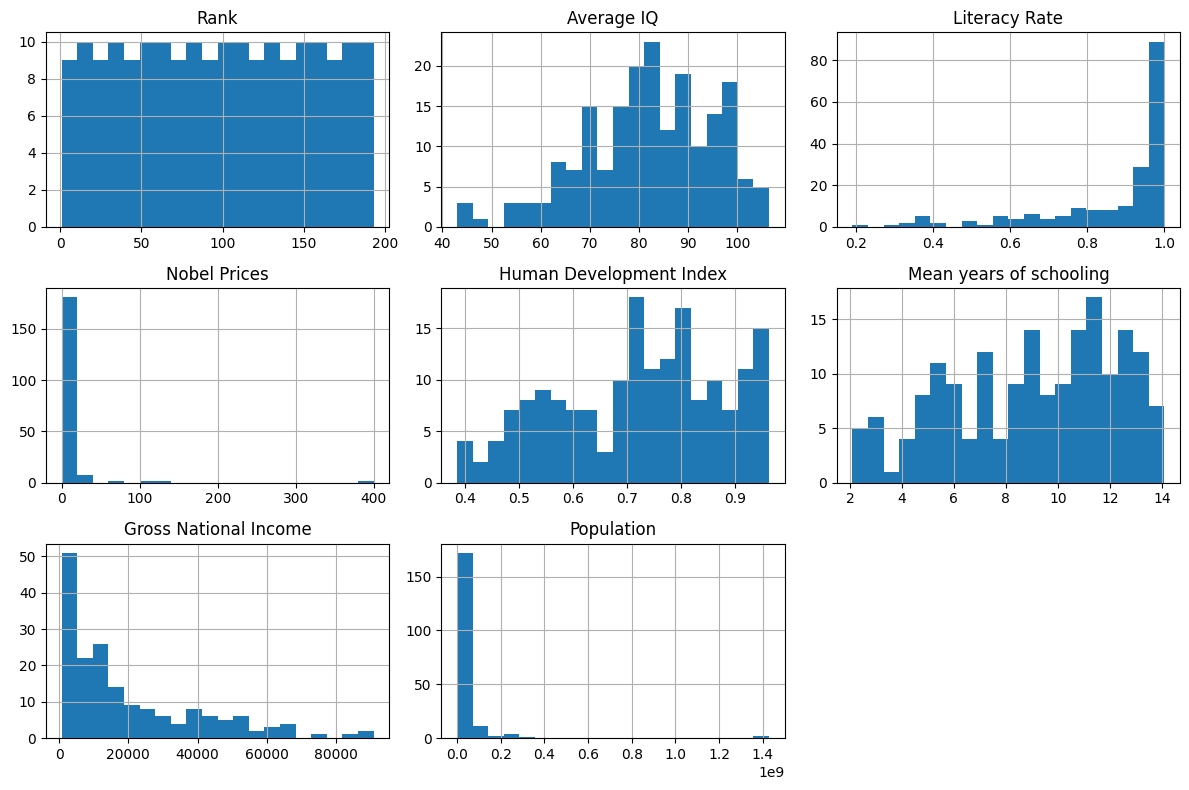

In [75]:

import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

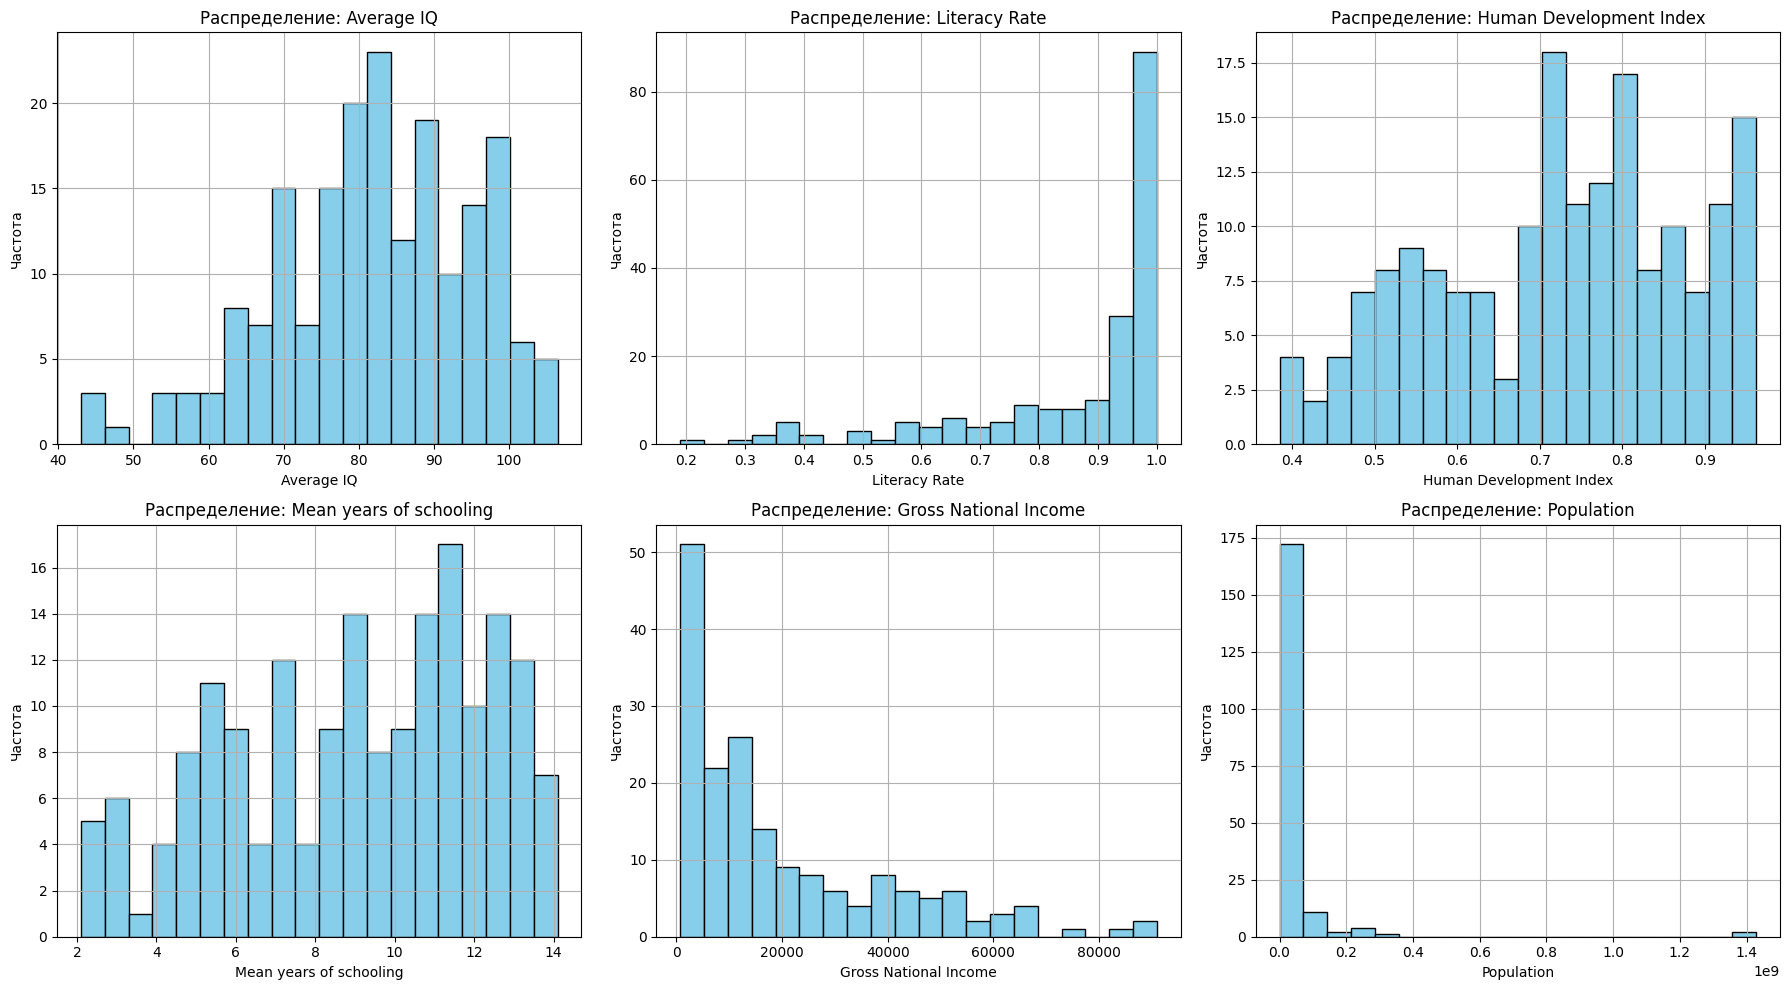

In [77]:
#Распределения ключевых показателей
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(['Average IQ', 'Literacy Rate', 'Human Development Index',
                         'Mean years of schooling', 'Gross National Income', 'Population']):
    df[col].hist(bins=20, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Распределение: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

In [80]:
numeric_cols = [
    'Average IQ', 'Literacy Rate', 'Nobel Prices', 'Human Development Index',
    'Mean years of schooling', 'Gross National Income', 'Population'
]



Средние показатели по континентам:
                 Average IQ  Literacy Rate  Nobel Prices  \
Continent                                                  
Africa                68.57           0.67          0.50   
Asia                  85.80           0.89          1.65   
Central America       75.11           0.92          0.26   
Europe                94.75           0.99         14.32   
Europe/Asia           89.20           0.99          0.67   
North America         94.54           0.98        107.75   
Oceania               88.13           0.90          1.50   
South America         83.78           0.95          0.92   

                 Human Development Index  Mean years of schooling  \
Continent                                                           
Africa                              0.56                     5.81   
Asia                                0.74                     9.12   
Central America                     0.73                     9.03   
Europe            

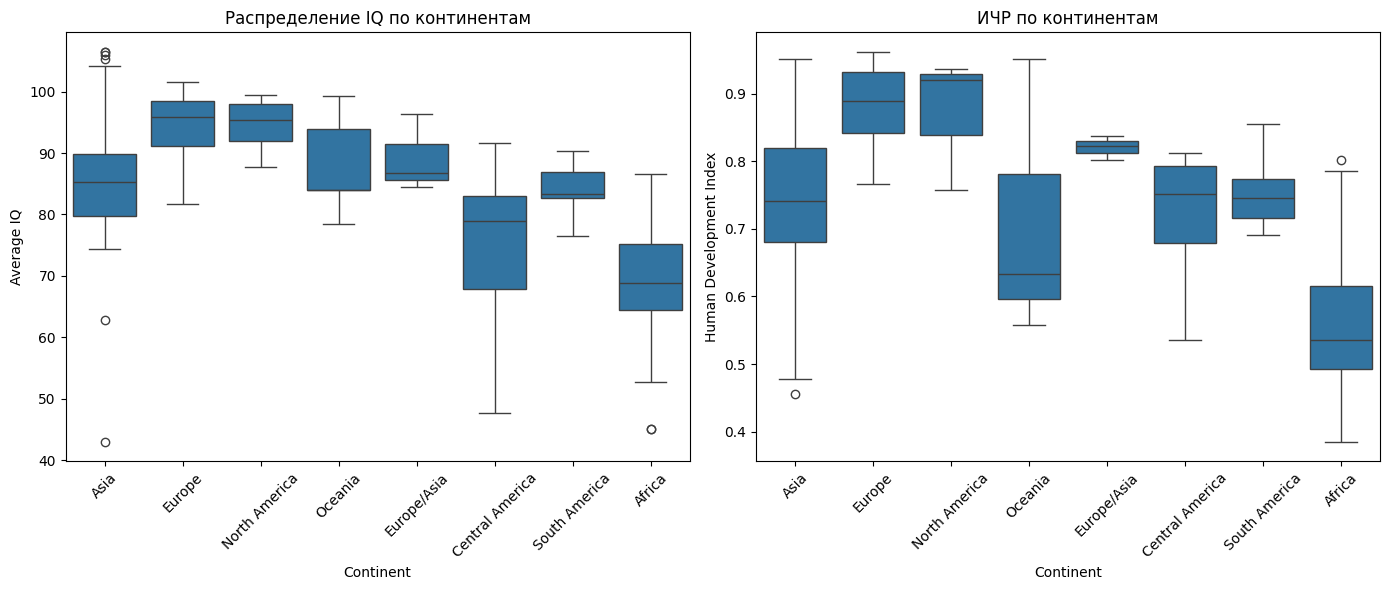

In [83]:
# Средние значения по континентам
continent_stats = df.groupby('Continent')[numeric_cols].mean().round(2)
print("\nСредние показатели по континентам:")
print(continent_stats)

# Визуализация: IQ и HDI по континентам
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df, x='Continent', y='Average IQ', ax=ax[0])
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Распределение IQ по континентам')

sns.boxplot(data=df, x='Continent', y='Human Development Index', ax=ax[1])
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('ИЧР по континентам')

plt.tight_layout()
plt.show()

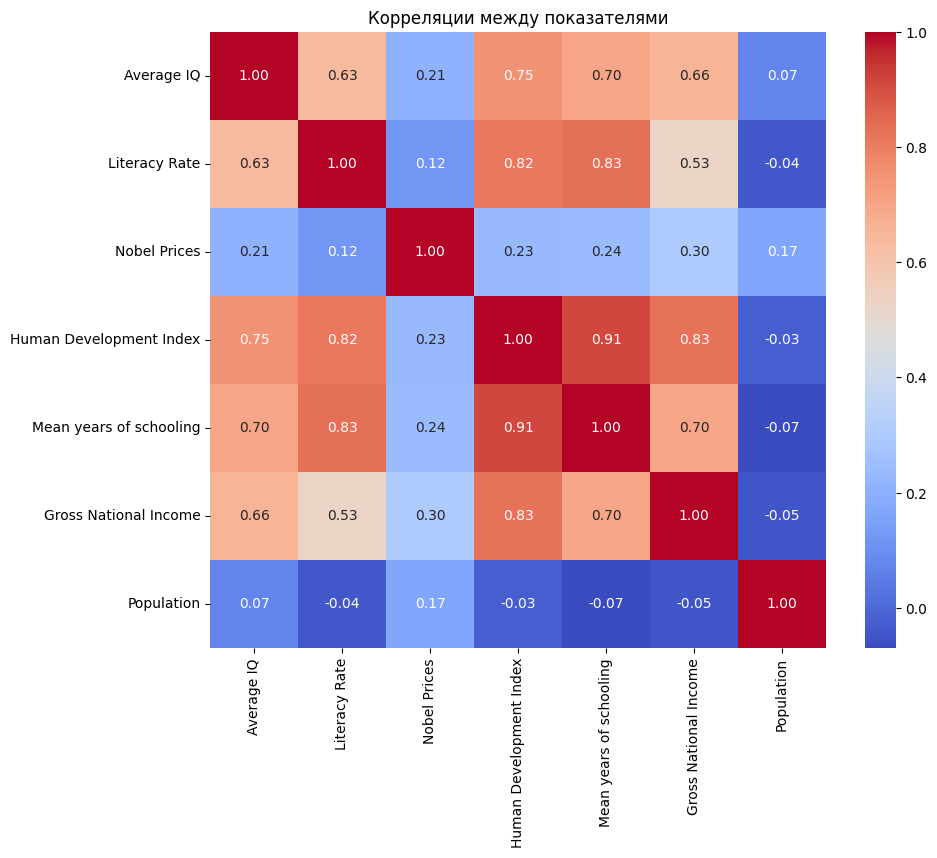

In [84]:
# Матрица корреляций
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Корреляции между показателями')
plt.show()

In [85]:
# Топ-10 по IQ
print("\nТоп-10 стран по среднему IQ:")
print(df[['Country', 'Average IQ', 'Continent']].sort_values('Average IQ', ascending=False).head(10))

# Топ-10 по Нобелевским премиям
print("\nТоп-10 по Нобелевским премиям:")
print(df[['Country', 'Nobel Prices', 'Continent']].sort_values('Nobel Prices', ascending=False).head(10))


Топ-10 стран по среднему IQ:
        Country  Average IQ Continent
0         Japan      106.48      Asia
1        Taiwan      106.47      Asia
2     Singapore      105.89      Asia
3     Hong Kong      105.37      Asia
4         China      104.10      Asia
5   South Korea      102.35      Asia
6       Belarus      101.60    Europe
7       Finland      101.20    Europe
9       Germany      100.74    Europe
10  Netherlands      100.74    Europe

Топ-10 по Нобелевским премиям:
           Country  Nobel Prices      Continent
27   United States         400.0  North America
19  United Kingdom         137.0         Europe
9          Germany         111.0         Europe
30          France          71.0         Europe
29          Sweden          32.0         Europe
0            Japan          29.0           Asia
15          Canada          28.0  North America
18     Switzerland          27.0         Europe
23         Austria          22.0         Europe
10     Netherlands          22.0        

In [87]:
# Пример: страны с IQ > 115 или < 70
print("\nСтраны с очень высоким IQ (>115):")
print(df[df['Average IQ'] > 115][['Country', 'Average IQ']])

print("\nСтраны с очень низким IQ (<70):")
print(df[df['Average IQ'] < 70][['Country', 'Average IQ', 'Continent']])


Страны с очень высоким IQ (>115):
Empty DataFrame
Columns: [Country, Average IQ]
Index: []

Страны с очень низким IQ (<70):
                              Country  Average IQ        Continent
152                            Rwanda       69.95           Africa
153                             Benin       69.71           Africa
154                            Malawi       69.70           Africa
155                       El Salvador       69.63  Central America
156                          Botswana       69.45           Africa
157                           Lesotho       68.87           Africa
158                      South Africa       68.87           Africa
159                          Eswatini       68.87           Africa
160                           Eritrea       68.77           Africa
161                      Saint Helena       68.74           Africa
162                            Zambia       68.43           Africa
163                          Ethiopia       68.42           Africa
164 

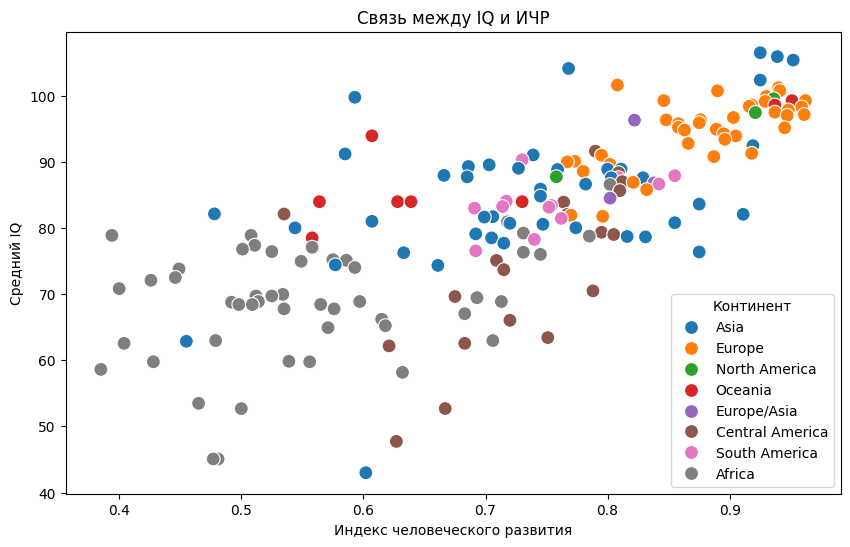

In [88]:
#IQ vs Индекс человеческого развития
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Human Development Index', y='Average IQ', hue='Continent', s=100)
plt.title('Связь между IQ и ИЧР')
plt.xlabel('Индекс человеческого развития')
plt.ylabel('Средний IQ')
plt.legend(title='Континент')
plt.show()

### Задача 3.

Для выполнения работы будет использован csv файл **“shopping_habits”**, содержащий данные о различных покупках, которые совершаются покупателями в разных штатах США. Каждое из наблюдений в файле имеет следующие характеристики:
 - **Customer ID** – порядковый номер строки в таблице
 - **Age** – возраст покупателя
 - **Gender** – пол покупателя
 - **Item Purchased** – приобретенный товар
 - **Category** - категория
 - **Purchase Amount (USD)** – сумма покупки (в долларах)
 - **Location** – локация покупки
 - **Size** – размер (одежды)
 - **Color** – цвет
 - **Season** – время года совершения покупки
 - **Review Rating** – полученный в отзыве рейтинг
 - **Subscription Status** – статус подписки покупателя
 - **Shipping Type** – тип доставки
 - **Discount Applied** – применена ли скидка
 - **Promo Code Used** – применен ли промокод
 - **Previous Purchases** – были ли у данного покупателя предыдущие покупки
 - **Payment Method** – способ оплаты
 - **Frequency of Purchases** – частота покупок.

Задание: **проведи** разведочный анализ данных, **выяви** необычные взаимосвязи между значениями столбцов таблицы, **выполни** визуализацию, **сделай** выводы.

Файл “shopping_habits.csv“ можно скачать по [ссылке](https://drive.google.com/file/d/1Y7L6PQcr8_jblDWNqunh3XLG7YgUViT-/view?usp=sharing)

In [ ]:
#инициализация dataframe
FILE_ID = '1Y7L6PQcr8_jblDWNqunh3XLG7YgUViT-'  # ID таблицы
url = f'https://drive.google.com/uc?export=download&id={FILE_ID}'

df = pd.read_csv(url)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
